<a href="https://colab.research.google.com/github/hayatohayatohayato390110-lang/MP/blob/main/%E3%83%9E%E3%83%92%E3%83%B3%E3%83%89%E3%83%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📡 https://www.mahindratractor.com/english-sitemap.xml にアクセス中...
✅ データ取得成功！ 解析を開始します。


/tmp/ipython-input-1853012478.py:89: UserWarning: Glyph 25945 (\N{CJK UNIFIED IDEOGRAPH-6559}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1853012478.py:89: UserWarning: Glyph 32946 (\N{CJK UNIFIED IDEOGRAPH-80B2}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1853012478.py:89: UserWarning: Glyph 12539 (\N{KATAKANA MIDDLE DOT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1853012478.py:89: UserWarning: Glyph 35352 (\N{CJK UNIFIED IDEOGRAPH-8A18}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1853012478.py:89: UserWarning: Glyph 20107 (\N{CJK UNIFIED IDEOGRAPH-4E8B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1853012478.py:89: UserWarning: Glyph 12488 (\N{KATAKANA LETTER TO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1853012478.py:89: UserWarning: Glyph 12521 (\N{KATAKANA LETTER RA}) missing from font(s) DejaVu 

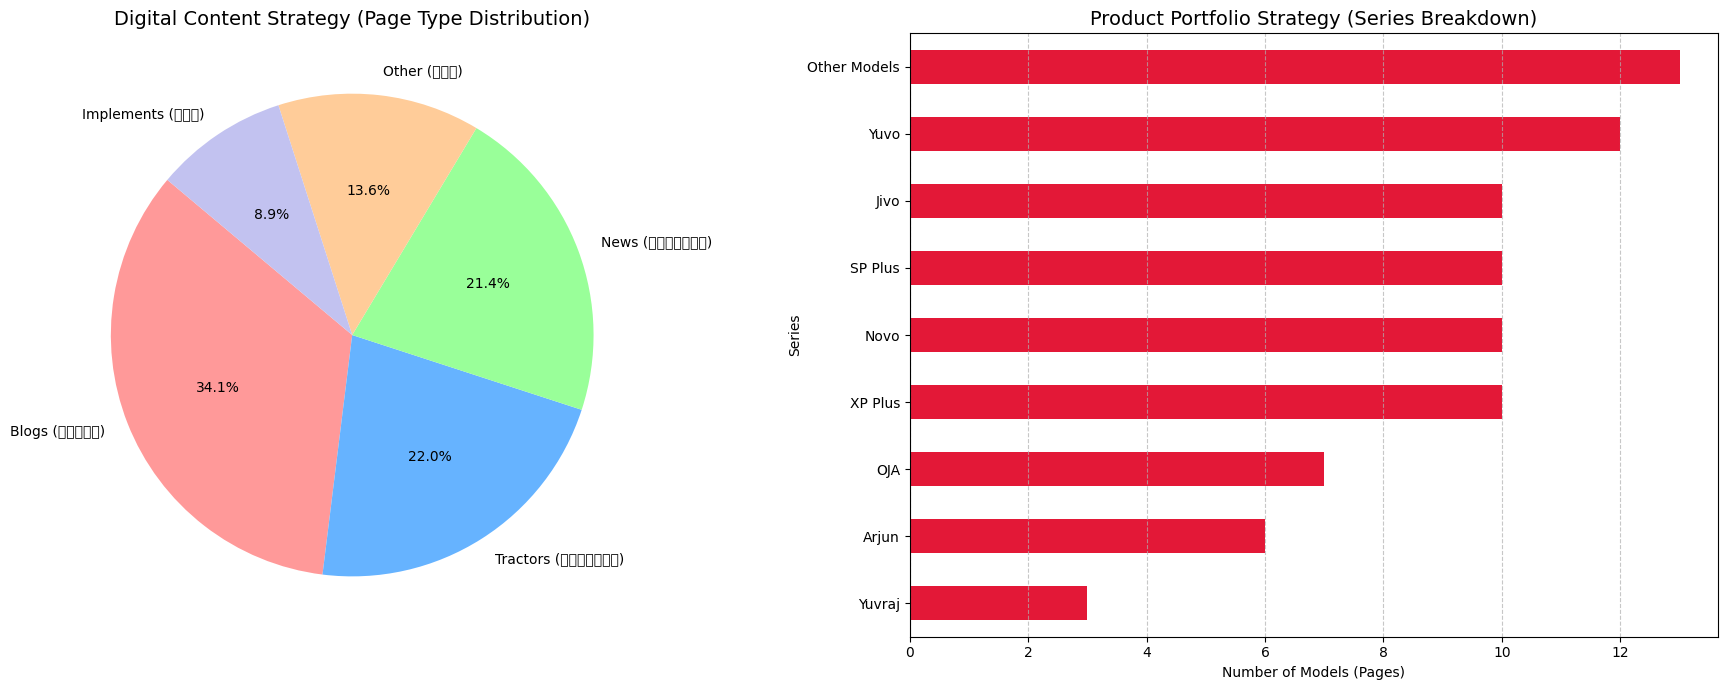


=== 📊 ページタイプ別 件数 ===
Page_Type
Blogs (教育・記事)         126
Tractors (トラクター製品)     81
News (プレスリリース)         79
Other (その他)            50
Implements (作業機)       33
Name: count, dtype: int64

=== 🚜 トラクターシリーズ別 件数 ===
Series
Other Models    13
Yuvo            12
Jivo            10
SP Plus         10
Novo            10
XP Plus         10
OJA              7
Arjun            6
Yuvraj           3
Name: count, dtype: int64


In [2]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# 1. ターゲットURLの設定
target_url = "https://www.mahindratractor.com/english-sitemap.xml"

# 2. 自動取得の設定（Chromeブラウザになりすます）
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36'
}

print(f"📡 {target_url} にアクセス中...")

try:
    response = requests.get(target_url, headers=headers, timeout=10)

    if response.status_code == 200:
        print("✅ データ取得成功！ 解析を開始します。")
        xml_data = response.text

        # 3. データの読み込み
        soup = BeautifulSoup(xml_data, 'xml')
        urls = [tag.text for tag in soup.find_all('loc')]

        if not urls:
            print("⚠️ URLリストが見つかりませんでした。")
        else:
            df = pd.DataFrame(urls, columns=['url'])

            # ==========================================
            #  ここが機能追加ポイント：2種類の分類を作る
            # ==========================================

            # 機能A: ページタイプ（大分類）の判定
            def get_page_type(url):
                url_lower = url.lower()
                if '/blog/' in url_lower: return 'Blogs (教育・記事)'
                if '/news/' in url_lower or '/press-releases/' in url_lower: return 'News (プレスリリース)'
                if '/tractors-implements/' in url_lower: return 'Implements (作業機)'
                if '/tractors/' in url_lower or '/tractor/' in url_lower: return 'Tractors (トラクター製品)'
                return 'Other (その他)'

            # 機能B: トラクターシリーズ（詳細）の判定
            def get_tractor_series(url):
                url_lower = url.lower()
                # トラクター製品ページ以外は「対象外」とする
                if not ('/tractors/' in url_lower or '/tractor/' in url_lower): return None
                if '/tractors-implements/' in url_lower: return None # 作業機は除外

                if 'oja' in url_lower: return 'OJA'
                if 'jivo' in url_lower: return 'Jivo'
                if 'yuvo' in url_lower: return 'Yuvo'
                if 'novo' in url_lower: return 'Novo'
                if 'arjun' in url_lower: return 'Arjun'
                if 'xp' in url_lower: return 'XP Plus'
                if 'sp' in url_lower: return 'SP Plus'
                if 'yuvraj' in url_lower: return 'Yuvraj'
                return 'Other Models'

            # 判定実行
            df['Page_Type'] = df['url'].apply(get_page_type)
            df['Series'] = df['url'].apply(get_tractor_series)

            # 集計
            type_counts = df['Page_Type'].value_counts()
            series_counts = df['Series'].value_counts()

            # ==========================================
            #  グラフ描画エリア（2つのグラフを並べる）
            # ==========================================
            fig, axes = plt.subplots(1, 2, figsize=(18, 7))

            # グラフ1: サイト全体のコンテンツ配分（円グラフ）
            # パステルカラーの設定
            colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0']
            axes[0].pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
            axes[0].set_title('Digital Content Strategy (Page Type Distribution)', fontsize=14)

            # グラフ2: トラクターシリーズの内訳（横棒グラフ）
            # マヒンドラレッドで統一
            series_counts.plot(kind='barh', ax=axes[1], color='#E31837')
            axes[1].set_title('Product Portfolio Strategy (Series Breakdown)', fontsize=14)
            axes[1].set_xlabel('Number of Models (Pages)')
            axes[1].invert_yaxis() # 上から多い順に並べる
            axes[1].grid(axis='x', linestyle='--', alpha=0.7)

            plt.tight_layout()
            plt.show()

            # 数値データも表示
            print("\n=== 📊 ページタイプ別 件数 ===")
            print(type_counts)
            print("\n=== 🚜 トラクターシリーズ別 件数 ===")
            print(series_counts)

    else:
        print(f"❌ アクセス失敗: {response.status_code}")

except Exception as e:
    print(f"❌ エラーが発生しました: {e}")

📡 https://www.mahindratractor.com/english-sitemap.xml にアクセス中...
✅ データ取得成功！ 詳細解析を開始します。


/tmp/ipython-input-2243786902.py:112: UserWarning: Glyph 12502 (\N{KATAKANA LETTER BU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2243786902.py:112: UserWarning: Glyph 12525 (\N{KATAKANA LETTER RO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2243786902.py:112: UserWarning: Glyph 12464 (\N{KATAKANA LETTER GU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2243786902.py:112: UserWarning: Glyph 35352 (\N{CJK UNIFIED IDEOGRAPH-8A18}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2243786902.py:112: UserWarning: Glyph 20107 (\N{CJK UNIFIED IDEOGRAPH-4E8B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2243786902.py:112: UserWarning: Glyph 12488 (\N{KATAKANA LETTER TO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2243786902.py:112: UserWarning: Glyph 12521 (\N{KATAKANA LETTER RA}) missing from font(s) DejaVu Sans.
  pl

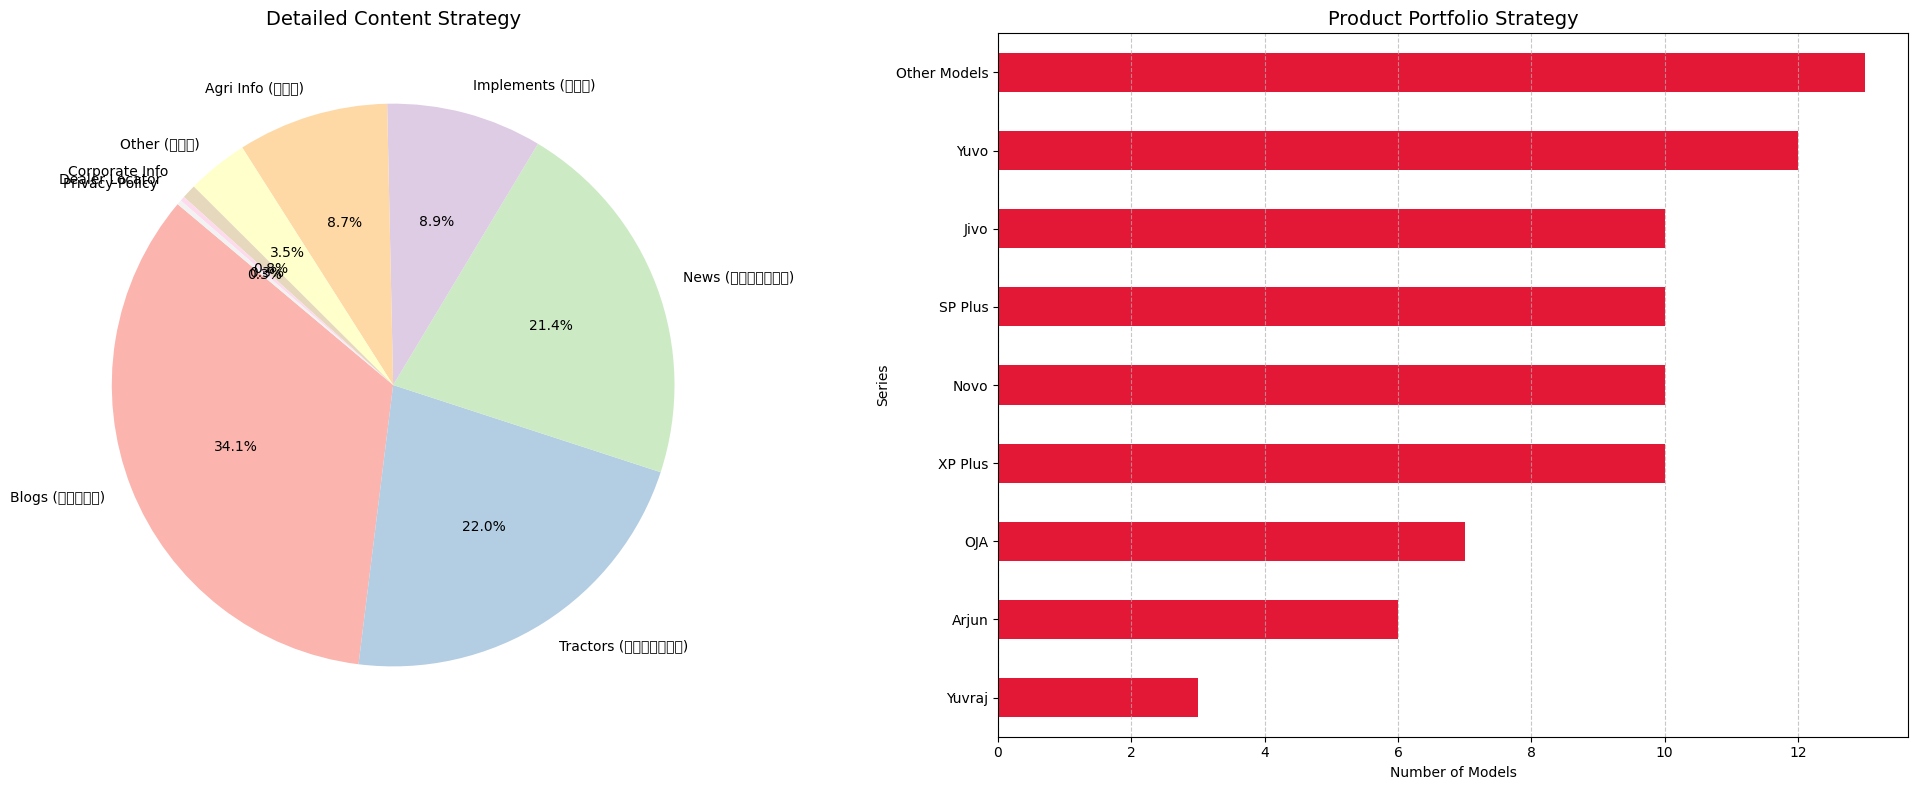


=== 📊 ページタイプ別 詳細内訳 ===
Page_Type
Blogs (ブログ記事)         126
Tractors (トラクター製品)     81
News (プレスリリース)         79
Implements (作業機)       33
Agri Info (読み物)        32
Other (その他)            13
Corporate Info          3
Dealer Locator          1
Privacy Policy          1
Name: count, dtype: int64

=== 🚜 トラクターシリーズ別 件数 ===
Series
Other Models    13
Yuvo            12
Jivo            10
SP Plus         10
Novo            10
XP Plus         10
OJA              7
Arjun            6
Yuvraj           3
Name: count, dtype: int64


In [3]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# 1. ターゲットURLの設定
target_url = "https://www.mahindratractor.com/english-sitemap.xml"

# 2. 自動取得の設定
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36'
}

print(f"📡 {target_url} にアクセス中...")

try:
    response = requests.get(target_url, headers=headers, timeout=10)

    if response.status_code == 200:
        print("✅ データ取得成功！ 詳細解析を開始します。")
        xml_data = response.text

        # 3. データの読み込み
        soup = BeautifulSoup(xml_data, 'xml')
        urls = [tag.text for tag in soup.find_all('loc')]

        if not urls:
            print("⚠️ URLリストが見つかりませんでした。")
        else:
            df = pd.DataFrame(urls, columns=['url'])

            # ==========================================
            #  ここが修正ポイント：分類ロジックを詳細化
            # ==========================================

            # 機能A: ページタイプ（大分類）の詳細判定
            def get_page_type(url):
                url_lower = url.lower()

                # --- 優先度1: 主要コンテンツ ---
                if '/blog/' in url_lower:
                    return 'Blogs (ブログ記事)'
                if '/news/' in url_lower or '/press-releases/' in url_lower:
                    return 'News (プレスリリース)'
                if '/tractors-implements/' in url_lower:
                    return 'Implements (作業機)'
                if '/tractors/' in url_lower or '/tractor/' in url_lower:
                    return 'Tractors (トラクター製品)'

                # --- 優先度2: 「その他」を細かく分解（今回の追加要望） ---
                # 1. プライバシーポリシー
                if 'privacypolicy' in url_lower or 'terms' in url_lower:
                    return 'Privacy Policy'

                # 2. ディーラー検索
                if 'dealer-locator' in url_lower:
                    return 'Dealer Locator'

                # 3. 企業情報 (会社概要、お問い合わせ、サービス等)
                if 'about-us' in url_lower or 'contactus' in url_lower or '/services' in url_lower:
                    return 'Corporate Info'

                # 4. 農業情報・読み物 (ブログ以外: agriculture, web-stories, faq等)
                if '/agriculture/' in url_lower or '/web-stories/' in url_lower or '/faqs' in url_lower or 'kisandivas' in url_lower or 'flipbook' in url_lower:
                    return 'Agri Info (読み物)'

                # それでも当てはまらないもの
                return 'Other (その他)'

            # 機能B: トラクターシリーズ判定（変更なし）
            def get_tractor_series(url):
                url_lower = url.lower()
                if not ('/tractors/' in url_lower or '/tractor/' in url_lower): return None
                if '/tractors-implements/' in url_lower: return None

                if 'oja' in url_lower: return 'OJA'
                if 'jivo' in url_lower: return 'Jivo'
                if 'yuvo' in url_lower: return 'Yuvo'
                if 'novo' in url_lower: return 'Novo'
                if 'arjun' in url_lower: return 'Arjun'
                if 'xp' in url_lower: return 'XP Plus'
                if 'sp' in url_lower: return 'SP Plus'
                if 'yuvraj' in url_lower: return 'Yuvraj'
                return 'Other Models'

            # 判定実行
            df['Page_Type'] = df['url'].apply(get_page_type)
            df['Series'] = df['url'].apply(get_tractor_series)

            # 集計
            type_counts = df['Page_Type'].value_counts()
            series_counts = df['Series'].value_counts()

            # ==========================================
            #  グラフ描画エリア
            # ==========================================
            fig, axes = plt.subplots(1, 2, figsize=(20, 8)) # 横幅を少し広げました

            # グラフ1: サイト全体のコンテンツ配分（項目が増えたため色を追加）
            # 詳細な分類が見やすいよう、ラベルの文字サイズを調整
            axes[0].pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140,
                        colors=plt.cm.Pastel1.colors) # 自動で色分けする設定に変更
            axes[0].set_title('Detailed Content Strategy', fontsize=14)

            # グラフ2: トラクターシリーズの内訳
            series_counts.plot(kind='barh', ax=axes[1], color='#E31837')
            axes[1].set_title('Product Portfolio Strategy', fontsize=14)
            axes[1].set_xlabel('Number of Models')
            axes[1].invert_yaxis()
            axes[1].grid(axis='x', linestyle='--', alpha=0.7)

            plt.tight_layout()
            plt.show()

            # 数値データ表示
            print("\n=== 📊 ページタイプ別 詳細内訳 ===")
            print(type_counts)
            print("\n=== 🚜 トラクターシリーズ別 件数 ===")
            print(series_counts)

    else:
        print(f"❌ アクセス失敗: {response.status_code}")

except Exception as e:
    print(f"❌ エラーが発生しました: {e}")